In [1]:
import pandas as pd
import numpy as np

import re

pd.set_option('display.float_format', '{:.2f}'.format) #8.388252e+05 => 838825.23

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (15, 5)
plt.style.use('bmh')
%matplotlib inline

In [7]:
cd input


C:\Users\benia\Desktop\Machine_Learning\Forecasting value property\input


In [8]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 588D-4BF9

 Directory of C:\Users\benia\Desktop\Machine_Learning\Forecasting value property\input

22.02.2020  13:04    <DIR>          .
22.02.2020  13:04    <DIR>          ..
13.12.2019  17:32        12˙594˙968 property_polish.h5
               1 File(s)     12˙594˙968 bytes
               2 Dir(s)  41˙195˙061˙248 bytes free


In [9]:
df = pd.read_hdf('property_polish.h5')
df.sample(5)

,building,extra_benefits,parking,apartament,offer,surroundings,extra_description,benefit_investment,broker_license,stats,...,location,finishing,bathroom,apartament_fix,price,y_pred_price_mean,price_m2,y_pred_price_m2_mean_area,price_log,price_log_m2
0,"{'Typ budynku': 'wieżowiec', 'Liczba pięter': ...","internet, TV kablowa, winda, ogrzewanie miejsk...",NaN,"{'Liczba pokoi': '1', 'Forma własności': 'spół...",410 000 zł (6 721 zł/m,{'Zdrowie': [' ...,[3 pokojowe rozkładowe mieszkanie do remontu w...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Liczba pokoi': '3', 'Forma własności': 'spół...",410000.00,688142.59,6721.31,518502.90,12.92,0.21
0,"{'Typ budynku': 'kamienica', 'Liczba pięter': ...",NaN,NaN,"{'Liczba pokoi': '1', 'Kuchnia': 'bardzo dobry...",550 000 zł (11 957 zł/m,{'Zdrowie': [' ...,"[Nowoczesne, niebanalne mieszkanie w przedwoje...",NaN,Nr licencji pośrednika: 360,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Liczba pokoi': '2', 'Kuchnia': 'w aneksie', ...",550000.00,688142.59,11956.52,391002.19,13.22,0.29
0,"{'Typ budynku': 'blok', 'Liczba pięter': '3', ...","internet, TV kablowa, domofon",NaN,"{'Liczba pokoi': '3', 'Stan łazienki': 'z okne...",440 000 zł (6 832 zł/m,{'Zdrowie': [' ...,[Przestronne 3-pokojowe mieszkanie o pow. 64 m...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,"północne, zachodnie",-1,-1,"{'Liczba pokoi': '3', 'Stan łazienki': 'dobry'...",440000.00,688142.59,6832.30,547403.06,12.99,0.20
0,"{'Typ budynku': 'blok', 'Liczba pięter': '7', ...",NaN,NaN,"{'Liczba pokoi': '6', 'Kuchnia': '3', 'Forma w...",310 000 zł (5 536 zł/m,{'Zdrowie': [' ...,[3 pokojowe mieszkanie na Gocławiu. W bardzo d...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,-1,-1,-1,"{'Liczba pokoi': '3', 'Kuchnia': 'oddzielna', ...",310000.00,688142.59,5535.71,476002.66,12.64,0.23
0,"{'Typ budynku': 'blok', 'Liczba pięter': '6', ...","telefon, internet, TV kablowa, winda, domofon",NaN,"{'Liczba pokoi': '3', 'Stan łazienki': 'z okne...",371 000 zł (7 141 zł/m,{},[Rozkładowe mieszkanie w cichej i spokojnej ok...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,południowo-wschodnie,-1,-1,"{'Liczba pokoi': '3', 'Stan łazienki': 'dobry'...",371000.00,688142.59,7141.48,441577.47,12.82,0.25


In [10]:
def int_filter(val):
    return re.sub('[^0-9]','', val)

def float_filter(val):
    return re.sub('[^0-9\,\.]','', val).replace(',', '.')

def str_filter(val):
    return val.lower().strip()

def get_value(items, key, type_value=np.int8, filter_=None):
    try:
        value = filter_(items[key]) if filter_ else items[key]
        return type_value(value)
    except:
        return -1

In [27]:
map_building_params = {
    'bulding_floors': ['Liczba pięter', np.int, int_filter],
    'name': ['Nazwa budynku', np.str, str_filter],
    'year_building': ['Rok budowy', np.str, str_filter],
    'type_building': ['Typ budynku', np.str, str_filter],
}
    
map_apartament_params = {
    'ownership': ['Forma własności', np.str, str_filter],
    'loudness': ['Głośność', np.str, str_filter],
    'kitchen': ['Kuchnia', np.str, str_filter],
    'num_rooms': ['Liczba pokoi', np.int, int_filter],
    'num_levels': ['Liczba poziomów', np.int, int_filter],
    'windows': ['Okna', np.str, str_filter],
    'num_floor': [ 'Piętro', np.int, int_filter],
    'area': ['Powierzchnia', np.float, float_filter],
    'extra_area': [ 'Powierzchnia dodatkowa', np.float, float_filter],
    'installations': ['Stan instalacji', np.str, str_filter],
    'condition_general': [ 'Stan mieszkania', np.str, str_filter],
    'condition_bathroom': ['Stan łazienki', np.str, str_filter],
    'location': ['Usytuowanie wzgl. stron świata', np.str, str_filter],
    'finishing': ['Wykończenie', np.str, str_filter],
    'bathroom': ['Łazienka', np.str, str_filter],
}

In [28]:
for key, params in map_building_params.items():
    df[key] = df['building'].map(lambda items: get_value(*([items] + params)) )

for key, params in map_apartament_params.items():
    df[key] = df['apartament'].map(lambda items: get_value(*([items] + params)) )

In [29]:
df[ list(map_building_params.keys()) +  list(map_apartament_params.keys()) ]

,bulding_floors,name,year_building,type_building,ownership,loudness,kitchen,num_rooms,num_levels,windows,num_floor,area,extra_area,installations,condition_general,condition_bathroom,location,finishing,bathroom
0,4,-1,2018,apartamentowiec,-1,-1,do wykończenia,-1,-1,oddzielna,2,34.03,-1.00,-1,1,-1,-1,-1,-1
0,2,-1,2012,dom wielorodzinny,własność,-1,wysoki standard,1,4,nowa,2,138.00,-1.00,dobry,jednopoziomowe,oddzielna,nowe drewniane,-1,-1
0,4,-1,1995,apartamentowiec,własność,jednopoziomowe,-1,4,6,ciche,2,210.00,-1.00,-1,-1,-1,-1,-1,-1
0,8,-1,2018,apartamentowiec,-1,-1,do wykończenia,6,-1,-1,2,57.98,-1.00,-1,2,-1,-1,-1,-1
0,4,-1,1936,-1,własność,-1,-1,3,-1,-1,2,27.00,-1.00,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7,-1,1913,-1,własność,-1,do odświeżenia,3,-1,-1,2,61.55,-1.00,-1,2,-1,-1,-1,-1
0,3,-1,1938,kamienica,-1,-1,idealny,1,-1,z oknem,2,124.71,-1.00,-1,4,-1,-1,-1,-1
0,4,-1,2003,apartamentowiec,własność,-1,idealny,1,-1,w aneksie,2,89.00,-1.00,-1,3,-1,-1,-1,-1
0,8,-1,2003,blok,-1,jednopoziomowe,-1,8,4,dobry,2,110.00,-1.00,-1,-1,umiarkowanie ciche,-1,-1,-1


In [30]:
df['num_rooms'].value_counts()

 2     179
 1     169
 3     160
-1     112
 4      89
 5      55
 6      35
 7      24
 8      21
 9      18
 10     13
 11      4
 14      4
 15      4
 12      2
 13      2
 16      2
 30      2
 17      1
Name: num_rooms, dtype: int64

In [40]:
orders = {
    'Forma własności': 1,
    'Powierzchnia': 2,
    'Piętro': 3,
    'Liczba pokoi': 4,
    'Liczba poziomów': 5,
    'Wykończenie': 6,
    'Stan mieszkania': 7,
    'Głośność': 8,
    'Kuchnia': 9,
    'Łazienka': 10,
    'Stan łazienki': 11,
    'Stan instalacji': 12,
    'Okna': 13,
    'Usytuowanie wzgl. stron świata': 14,
    'Powierzchnia dodatkowa': 15
}

def get_map_attrs(apartament):
    sorted_attrs = sorted([ (key, orders[key]) for key in apartament.keys()], key=lambda key: key[1])

    map_attrs = {}
    for idx, attr in enumerate(sorted_attrs):
        if attr[0] == 'Forma własności' or attr[0] == 'Powierzchnia': 
            map_attrs[attr[0]] = sorted_attrs[idx][0]
            continue

        if idx + 1 < len(sorted_attrs):
            map_attrs[attr[0]] = sorted_attrs[idx+1][0]
            
    return map_attrs
            
def do_apartament_fix(apartament):
    if 'nan' == str(apartament): return np.nan
    
    map_attrs = get_map_attrs(apartament)
    apartment_fix = {}
    for key in apartament:
        if key not in map_attrs: continue
        apartment_fix[key] = apartament[map_attrs[key]]
            
    return apartment_fix

df['apartament_fix'] = df['apartament'].map(do_apartament_fix)

In [42]:
for key, params in map_apartament_params.items():
    df[key] = df['apartament_fix'].map(lambda items: get_value(*([items] + params)) )

In [44]:
df['num_floor'].value_counts()

 1     169
 2     169
 3     161
-1     121
 4      89
 5      55
 6      35
 7      24
 8      21
 9      18
 10     13
 11      4
 14      4
 15      4
 12      2
 13      2
 16      2
 30      2
 17      1
Name: num_floor, dtype: int64

In [45]:
df.offer

0       268 300 zł (7 884 zł/m
0     1 188 000 zł (8 609 zł/m
0    2 990 000 zł (14 238 zł/m
0      979 862 zł (16 900 zł/m
0      375 000 zł (13 889 zł/m
               ...            
0       520 000 zł (8 448 zł/m
0    1 620 000 zł (12 990 zł/m
0       699 000 zł (7 854 zł/m
0       940 000 zł (8 545 zł/m
0       350 000 zł (9 211 zł/m
Name: offer, Length: 896, dtype: object

In [46]:
def get_price(value):
    if str(value) == 'nan': return -1
    if 'Zapytaj o cenę' == value: return -2

    
    return value.split(' zł')[0].replace(' ', '').replace(',', '.')
    
    
df['price'] = df['offer'].map(get_price).astype(np.float)

In [47]:
df['price_m2'] = df['price'] / df['area']

In [48]:
df = df[ df.price > 0 ]

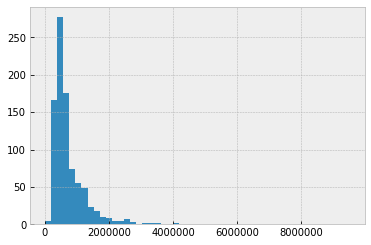

In [49]:
df.price.hist(bins=50);

In [50]:
dfp = pd.pivot_table(df, index=['num_rooms'], values=['price', 'price_m2', 'area'], aggfunc='mean')
dfp

,area,price,price_m2
num_rooms,,,
-1,85.02,1023688.84,10533.91
1,34.69,334518.21,9853.66
2,51.50,485862.98,9306.96
3,75.13,696338.25,9006.97
4,110.70,1137840.82,9846.68
5,155.71,1846136.14,11450.31
6,191.70,1638800.00,8435.46
7,159.95,1414500.00,8884.21
12,300.00,600000.00,2000.00


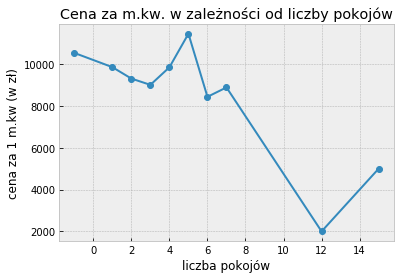

In [51]:
plt.title('Cena za m.kw. w zależności od liczby pokojów')
plt.xlabel('liczba pokojów')
plt.ylabel('cena za 1 m.kw (w zł)')
plt.plot( dfp.index, dfp.price_m2, 'o-' );

In [52]:
dfp = pd.pivot_table(df, index=['bulding_floors'], values=['price', 'price_m2', 'area'], aggfunc='mean').reset_index()
dfp

,bulding_floors,area,price,price_m2
0,-1,94.90,967793.75,10068.63
1,1,97.44,701666.67,7417.08
2,2,82.83,786793.53,9173.45
3,3,70.82,705696.13,9057.30
4,4,78.41,718716.58,8991.94
5,5,88.63,939639.43,10570.67
6,6,80.58,926441.37,10609.56
7,7,77.19,789634.29,9627.26
8,8,74.61,760761.34,9992.17
9,9,77.88,835764.71,10339.91


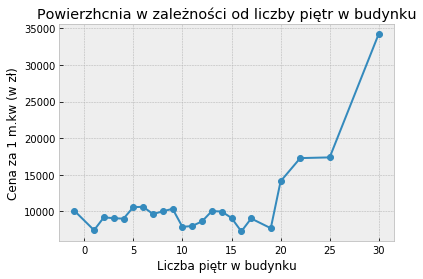

In [53]:
plt.title('Powierzhcnia w zależności od liczby piętr w budynku')
plt.xlabel('Liczba piętr w budynku')
plt.ylabel('Cena za 1 m.kw (w zł)')
plt.plot( dfp.bulding_floors, dfp.price_m2, 'o-' );

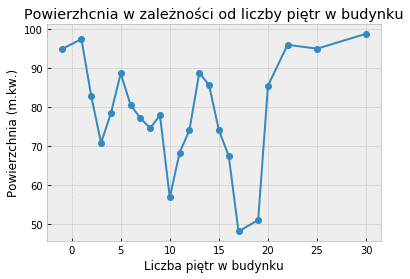

In [54]:
plt.title('Powierzhcnia w zależności od liczby piętr w budynku')
plt.xlabel('Liczba piętr w budynku')
plt.ylabel('Powierzchnia (m.kw.)')
plt.plot( dfp.bulding_floors, dfp.area, 'o-' );

In [59]:
df['year_building']

0    2018
0    2012
0    1995
0    2018
0    1936
     ... 
0    1913
0    1938
0    2003
0    2003
0    1939
Name: year_building, Length: 896, dtype: object

In [65]:
dfp = pd.pivot_table(df, index=['kitchen'], values=['price', 'price_m2', 'area'], aggfunc='mean').reset_index()
dfp

,kitchen,area,price,price_m2
0,-1,80.46,838825.23,9908.30
1,oddzielna,64.89,544701.64,8289.44
2,"oddzielna, z wyposażeniem",191.55,2590000.00,13521.27
3,prześwit,51.17,519750.00,9729.37
4,w aneksie,76.05,767834.69,9648.99
5,"w aneksie, w zabudowie",29.80,205000.00,6879.19
6,z oknem,74.91,633653.67,8310.00
7,"z oknem, oddzielna",63.63,450375.00,6976.49
8,"z oknem, oddzielna, z wyposażeniem",49.50,382500.00,7719.44
9,"z oknem, oddzielna, z wyposażeniem, w zabudowie",57.60,772800.00,12339.76


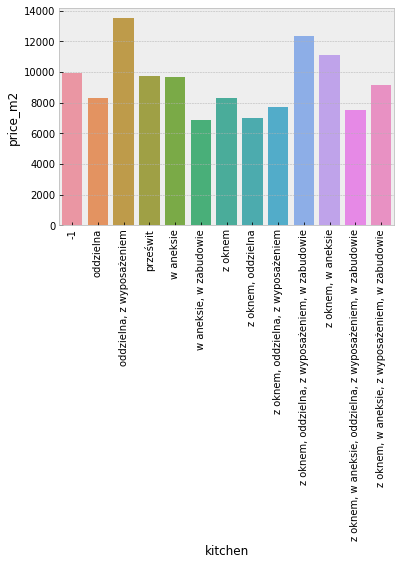

In [66]:
sns.barplot(x="kitchen", y="price_m2", data=dfp)
plt.xticks(rotation=90);

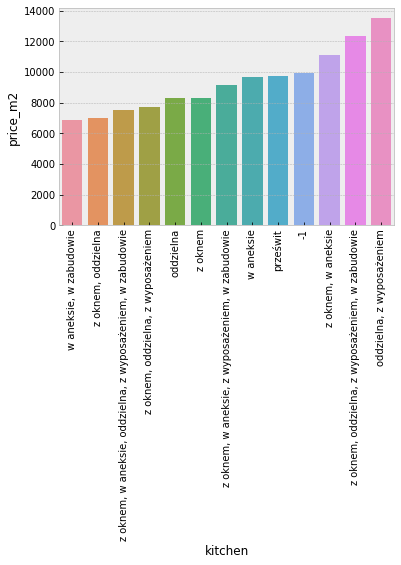

In [67]:
sns.barplot(x="kitchen", y="price_m2", data=dfp.sort_values(by='price_m2'))
plt.xticks(rotation=90);

In [68]:
def plot_sorted_barplot(index, main_value='price_m2', values=['price', 'price_m2', 'area'], aggfunc='mean'):
    dfp = pd.pivot_table(df, index=index, values=values, aggfunc=aggfunc).reset_index()
    sns.barplot(x=index, y=main_value, data=dfp.sort_values(by=main_value).reset_index(drop=True))
    plt.xticks(rotation=90);
    plt.show()

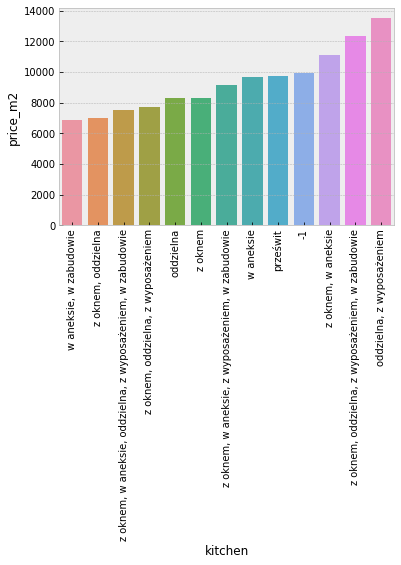

In [69]:
plot_sorted_barplot('kitchen')

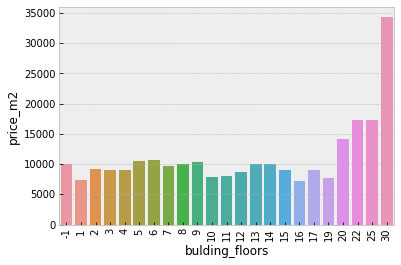

In [72]:
plot_sorted_barplot('bulding_floors')

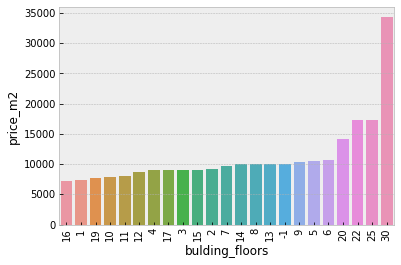

In [73]:
def plot_sorted_barplot(group_column, main_value='price_m2', values=['price', 'price_m2', 'area'], aggfunc='mean'):
    dfp = pd.pivot_table(df, index=group_column, values=values, aggfunc='mean').reset_index()
    dfp = dfp.sort_values(by=main_value).reset_index(drop=True)

    ax = sns.barplot(x=dfp.index, y=main_value, data=dfp)
    ax.set_xticklabels(dfp[group_column])
    ax.set(xlabel=group_column, ylabel=main_value)

    plt.xticks(rotation=90)
    plt.show()
    
plot_sorted_barplot('bulding_floors')

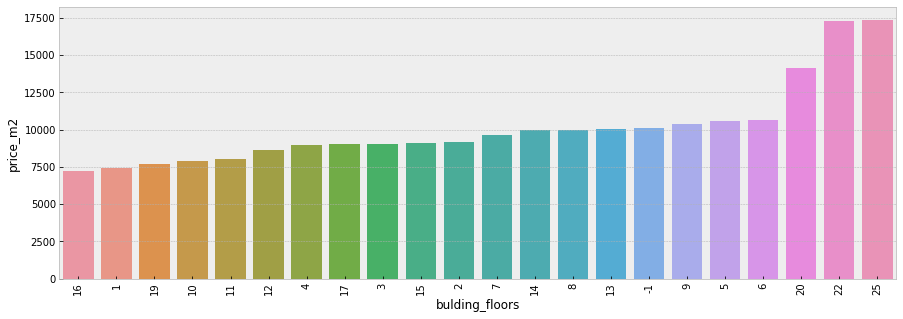

In [74]:
def plot_sorted_barplot(df, group_column, main_value='price_m2', values=['price', 'price_m2', 'area'], aggfunc='mean'):
    plt.figure(figsize=(15, 5))
    dfp = pd.pivot_table(df, index=group_column, values=values, aggfunc='mean').reset_index()
    dfp = dfp.sort_values(by=main_value).reset_index(drop=True)

    ax = sns.barplot(x=dfp.index, y=main_value, data=dfp)
    ax.set_xticklabels(dfp[group_column])
    ax.set(xlabel=group_column, ylabel=main_value)

    plt.xticks(rotation=90)
    plt.show()
    
plot_sorted_barplot(df[df.bulding_floors < 30], 'bulding_floors')

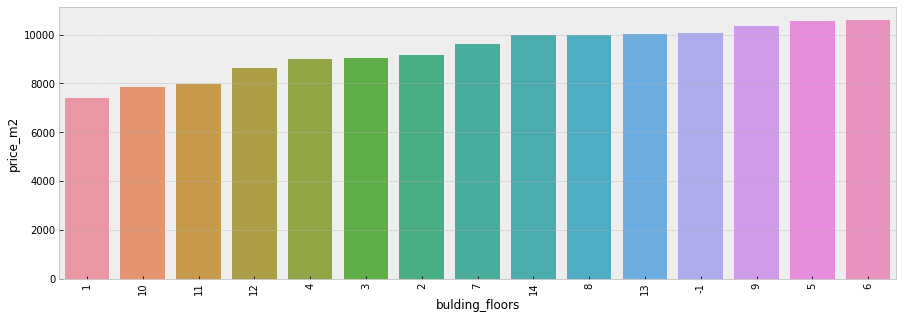

In [77]:
plot_sorted_barplot(df[df.bulding_floors < 15], 'bulding_floors')